In [99]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

C:\Anaconda3\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [100]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [101]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [102]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

In [103]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 10s 652us/step - loss: 0.6299 - acc: 0.6295 - val_loss: 0.4779 - val_acc: 0.8554
Epoch 2/10
15000/15000 [==============================] - 4s 289us/step - loss: 0.4395 - acc: 0.8136 - val_loss: 0.3189 - val_acc: 0.8803
Epoch 3/10
15000/15000 [==============================] - 4s 245us/step - loss: 0.3323 - acc: 0.8751 - val_loss: 0.2858 - val_acc: 0.8845
Epoch 4/10
15000/15000 [==============================] - 4s 241us/step - loss: 0.2697 - acc: 0.8999 - val_loss: 0.2787 - val_acc: 0.8865
Epoch 5/10
15000/15000 [==============================] - 4s 244us/step - loss: 0.2263 - acc: 0.9168 - val_loss: 0.2859 - val_acc: 0.8861
Epoch 6/10
15000/15000 [==============================] - 4s 290us/step - loss: 0.1992 - acc: 0.9283 - val_loss: 0.3083 - val_acc: 0.8871
Epoch 7/10
15000/15000 [==============================] - 5s 322us/step - loss: 0.1787 - acc: 0.9342 - val_loss: 0.3178 -

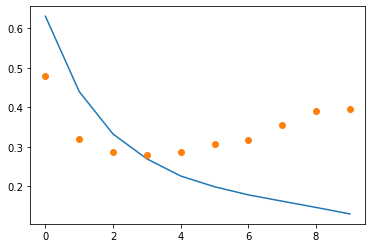

In [104]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [105]:
test_loss, test_acc = net.evaluate(X_test,y_test)

25000/25000 [==============================] - 12s 480us/step


In [106]:
print(test_loss,test_acc)

0.4200840018296242 0.8742799758911133


In [115]:
from keras.preprocessing import sequence

max_words=10000 
(X_train_seq, y_train_seq), (X_test_seq, y_test_seq) = imdb.load_data(num_words=max_words)

C:\Anaconda3\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [116]:
# Data preprocessing 

maxlen = 100 # sequence length
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(X_test_seq, maxlen=maxlen)

In [117]:
print(X_train_seq)
print(np.shape(X_train_seq))

[[1415   33    6 ...   19  178   32]
 [ 163   11 3215 ...   16  145   95]
 [1301    4 1873 ...    7  129  113]
 ...
 [  11    6 4065 ...    4 3586    2]
 [ 100 2198    8 ...   12    9   23]
 [  78 1099   17 ...  204  131    9]]
(25000, 100)


In [130]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) 
rnn.add(layers.SimpleRNN(16,activation = 'relu',return_sequences = True)) 
rnn.add(layers.Dropout(0.5))
rnn.add(layers.SimpleRNN(16,activation = 'relu',return_sequences = True))
rnn.add(layers.Dropout(0.5))
rnn.add(layers.SimpleRNN(16,activation = 'relu'))
rnn.add(layers.Dropout(0.5))
rnn.add(layers.Dense(1,activation = 'sigmoid'))
rnn.compile(optimizer = 'nadam',loss = 'binary_crossentropy',metrics = ['acc'])
rnn.summary()
# 다층 RNN를 하기 위해 return_sequences = True로 설정

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_48 (SimpleRNN)    (None, None, 16)          528       
_________________________________________________________________
dropout_52 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
simple_rnn_49 (SimpleRNN)    (None, None, 16)          528       
_________________________________________________________________
dropout_53 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
simple_rnn_50 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dropout_54 (Dropout)         (None, 16)              

In [131]:
history = rnn.fit(X_train_seq,y_train_seq,epochs = 10 ,batch_size = 128,verbose=1,validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 641us/step - loss: 0.6935 - acc: 0.5365 - val_loss: 0.6907 - val_acc: 0.5412
Epoch 2/10
20000/20000 [==============================] - 12s 590us/step - loss: 0.6524 - acc: 0.6382 - val_loss: 0.6330 - val_acc: 0.6692
Epoch 3/10
20000/20000 [==============================] - 11s 563us/step - loss: 0.5642 - acc: 0.7502 - val_loss: 0.5548 - val_acc: 0.7256
Epoch 4/10
20000/20000 [==============================] - 11s 573us/step - loss: 0.4864 - acc: 0.8026 - val_loss: 0.4747 - val_acc: 0.7932
Epoch 5/10
20000/20000 [==============================] - 11s 564us/step - loss: 0.4584 - acc: 0.8155 - val_loss: 0.4794 - val_acc: 0.7858
Epoch 6/10
20000/20000 [==============================] - 11s 561us/step - loss: 0.3886 - acc: 0.8550 - val_loss: 0.4422 - val_acc: 0.8030
Epoch 7/10
20000/20000 [==============================] - 11s 561us/step - loss: 0.3564 - acc: 0.8716 - val_loss: 0.4

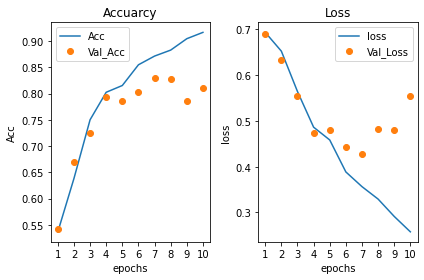

In [132]:
rnn_dict = history.history

rnn_acc = rnn_dict['acc']
rnn_val_acc = rnn_dict['val_acc']

rnn_loss = rnn_dict['loss']
rnn_val_loss = rnn_dict['val_loss']

x = np.arange(1,len(loss)+1)

plt.subplot(121)
plt.title('Accuarcy')
plt.plot(x,rnn_acc,'-',label = 'Acc')
plt.plot(x,rnn_val_acc,'o',label = 'Val_Acc')
plt.legend()
plt.xticks(range(1,11,1))
plt.xlabel('epochs')
plt.ylabel('Acc')

plt.subplot(122)
plt.title('Loss')
plt.plot(x,rnn_loss,'-',label = 'loss')
plt.plot(x,rnn_val_loss,'o',label = 'Val_Loss')
plt.legend()
plt.xticks(range(1,11,1))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.tight_layout()


In [133]:
rnn_test_loss, rnn_test_acc = rnn.evaluate(X_test_seq,y_test_seq)

25000/25000 [==============================] - 14s 558us/step


In [134]:
print(rnn_test_loss,rnn_test_acc)

0.5438209671211243 0.8037999868392944


다층 신경망을 통해서 얻었던 accuracy와 loss는 0.874, 0.420이었고, RNN을 통해서 얻은 accuarcy와 loss는 0.804, 0.544가 나왔다.
simple RNN 방식으로는 기존의 방식보다는 상대적으로 낮은 정확도와 손실율을 보였다.
RNN 방식을 개선한 LSTM같은 방법을 사용하면 더 좋은 정확도를 얻을 수 있을거라 생각이 든다.